# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 02. Importing Data

In [3]:
### Importing new geoJSON file

In [4]:
# Import ".json" file for the U.S. 

country_geo = r'D:\Data Analysis of Rental Prices in Berlin Using Python and Tableau\Data\Original Data\berlin_neighborhoods.geojson'

In [ ]:
# To check/look at the JSON file contents:

f = open(r'D:\Data Analysis of Rental Prices in Berlin Using Python and Tableau\Data\Original Data\berlin_neighborhoods.geojson')
  
# returns JSON object asa dictionary
data = json.load(f)

In [6]:
# Project folder

path = r'D:\Data Analysis of Rental Prices in Berlin Using Python and Tableau'

In [7]:
# Importing cleaned dataset

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'AirBnB Berlin_clean_2.csv'))

In [8]:
df.head()

,Unnamed: 0,id,host_id,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_365,num_reviews_ltm,price_category
0,0,4.021868e+07,39450649,Pankow,Buch,52.63136,13.51879,Entire home/apt,51,1,11,0.40,21,345,8,middle_price
1,1,3.784921e+07,286623313,Tempelhof - Schöneberg,Lichtenrade,52.37272,13.41607,Entire home/apt,40,28,2,0.07,1,352,0,middle_price
2,2,4.021881e+07,39450649,Pankow,Buch,52.63136,13.51879,Entire home/apt,87,1,3,0.16,21,304,2,high_price
3,3,3.243150e+07,243598169,Spandau,Falkenhagener Feld,52.55720,13.14205,Entire home/apt,55,3,16,0.43,1,215,5,middle_price
4,4,5.468740e+17,156670608,Spandau,Gatow / Kladow,52.45472,13.10890,Entire home/apt,90,3,4,2.55,1,251,4,high_price


In [9]:
df.shape

(16265, 16)

# 03. Data Wrangling

In [10]:
### Fixing dummy columns
# Select only the necessary columns and put them in a list called columns
columns = ['Pankow', 'Tempelhof - Schöneberg', 'Spandau',
       'Treptow - Köpenick', 'Steglitz - Zehlendorf', 'Neukölln',
       'Lichtenberg', 'Marzahn - Hellersdorf', 'Reinickendorf',
       'Friedrichshain-Kreuzberg', 'Mitte', 'Charlottenburg-Wilm.', 
         'latitude', 'longitude', 'neighborhood_group',
           'price', 'price_category', 'availability_365', 'host_listings_count',
          'reviews_per_month']

In [11]:
columns

['Pankow',
 'Tempelhof - Schöneberg',
 'Spandau',
 'Treptow - Köpenick',
 'Steglitz - Zehlendorf',
 'Neukölln',
 'Lichtenberg',
 'Marzahn - Hellersdorf',
 'Reinickendorf',
 'Friedrichshain-Kreuzberg',
 'Mitte',
 'Charlottenburg-Wilm.',
 'latitude',
 'longitude',
 'neighborhood_group',
 'price',
 'price_category',
 'availability_365',
 'host_listings_count',
 'reviews_per_month']

## As my df already has a neighboorhood_group categorical variable, indicating the different areas/neighboorhood groups, I do not need to create a subset, but rather only need to join the geojson file with my df to indicate the price ranges in the respective neighborhood_groups

# 04. Conduct consistency checks

In [12]:
df.neighborhood_group.unique()

array(['Pankow', 'Tempelhof - Schöneberg', 'Spandau',
       'Treptow - Köpenick', 'Steglitz - Zehlendorf', 'Neukölln',
       'Lichtenberg', 'Marzahn - Hellersdorf', 'Reinickendorf',
       'Friedrichshain-Kreuzberg', 'Mitte', 'Charlottenburg-Wilm.'],
      dtype=object)

#### Editing text in geojson file to match df neighborhood_group names

When looking at the geoJSON file, we can observe differences in the spelling of Berlin's neighborhood_group compared to the df.
With the use of Notepad++, I have modified several neighborhood names so that they are consistent amongst both files:
 'Pankow',
 'Tempelhof - Schoeneberg',
 'Treptow - Koepenick',
 'Steglitz - Zehlendorf',
 'Neukoelln',
 'Lichtenberg',
 'Marzahn - Hellersdorf',
 'Reinickendorf',
 'Friedrichshain-Kreuzberg',
 'Mitte',
 'Charlottenburg-Wilm.'

#### Replacing umlauts with 'oe' spelling for several neighborhoods

I ran into an issue after adjusting other spellings within the geojson file whereby umlauts were not registering in python although the spelling was 1-to-1 the same. As such, I have modified the spelling of the neighborhoods within the df with 'oe,' which will simplify the syntax and also removes the umlauts avoiding confusion and making it easier to join the df with the geojson file. 

In [13]:
df['neighborhood_group'].replace('Neukölln', 'Neukoelln', inplace=True)

In [14]:
df['neighborhood_group'].replace('Tempelhof - Schöneberg', 'Tempelhof - Schoeneberg', inplace=True)

In [15]:
df['neighborhood_group'].replace('Treptow - Köpenick', 'Treptow - Koepenick', inplace=True)

In [16]:
## Checking to confirm name changes so that both df and json align
df.neighborhood_group.unique()

array(['Pankow', 'Tempelhof - Schoeneberg', 'Spandau',
       'Treptow - Koepenick', 'Steglitz - Zehlendorf', 'Neukoelln',
       'Lichtenberg', 'Marzahn - Hellersdorf', 'Reinickendorf',
       'Friedrichshain-Kreuzberg', 'Mitte', 'Charlottenburg-Wilm.'],
      dtype=object)

In [17]:
# Import ".json" file for the U.S. 

country_geo = r'D:\Data Analysis of Rental Prices in Berlin Using Python and Tableau\Data\Original Data\berlin_neighborhoods.geojson'

In [18]:
# Check for missing values

df.isnull().sum()

Unnamed: 0             0
id                     0
host_id                0
neighborhood_group     0
neighborhood           0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
host_listings_count    0
availability_365       0
num_reviews_ltm        0
price_category         0
dtype: int64

In [19]:
# Last check for NaN

df.isnull().sum()

Unnamed: 0             0
id                     0
host_id                0
neighborhood_group     0
neighborhood           0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
host_listings_count    0
availability_365       0
num_reviews_ltm        0
price_category         0
dtype: int64

In [20]:
dups = df.duplicated()

In [21]:
dups.shape # no dups

(16265,)

<AxesSubplot:xlabel='price', ylabel='Count'>

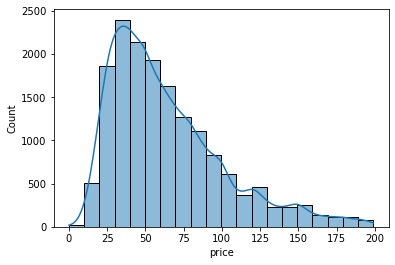

In [22]:
# Checking for extreme values
sns.histplot(df['price'], bins=20, kde = True) # shows extreme values for 'price'

While the histograph does have some right-skew, overall, the histogram does not seem as problematic, because in terms of rentals, there will always be a handful of more expensive overnight rentals for a short period of time. As such, I will leave these values becuase although there is some skew, it is totally imaginable that some high-end rentals may cost 150-200 EUR a night 

In [23]:
df.shape

(16265, 16)

# 05. Plotting a choropleth

In [24]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df[['neighborhood_group','price']]
data_to_plot.head()

,neighborhood_group,price
0,Pankow,51
1,Tempelhof - Schoeneberg,40
2,Pankow,87
3,Spandau,55
4,Spandau,90


In [25]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [52.5, 13.4], zoom_start = 9)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['neighborhood_group', 'price'],
    key_on = 'feature.properties.spatial_alias', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [26]:
map.save('plot_data.html')

Based on the above map, we can see that prices of AirBnB rentals are generally more expensive in the areas of 'Mitte' and 'Steglitz-Zehlendorf.' Of course, this map is of the main 12 neighborhood_groups, it is likely that specific unique neighborhoods within these districts would provide more detail to the specific neighborhoods.  

# 06. Further Mapping

In [27]:
# While the above heat map does provide a general overview of the potentially
# higher price rentals, I have included a plot map to provide more detail.  

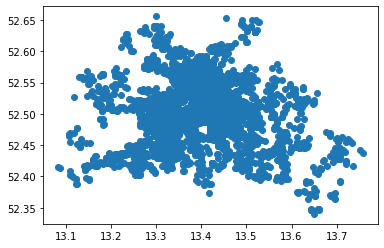

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x=df['longitude'], y=df['latitude'])
plt.show()

Without including another variable such as prices/availability_365, we cannot compare whether price or availability has an impact on where apartments are more frequently rented out. 

Creating a plot using plotly where I can determine the highest concentration of rentals as well show their price ranges

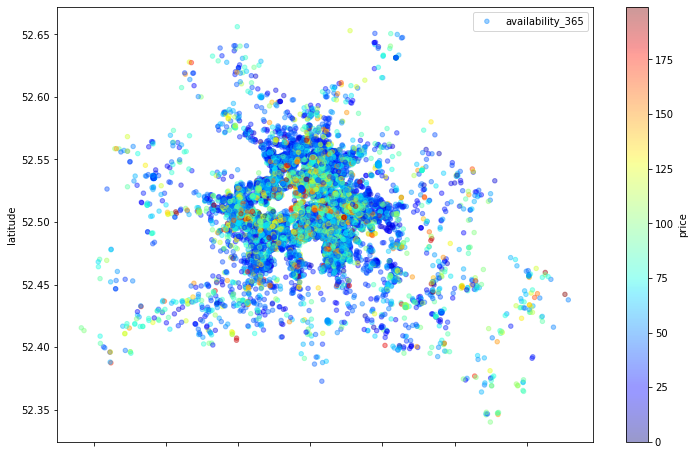

In [29]:
iz=df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(12,8))

While I personally understand the concentration of the map, as I am living for nearly seven months in Berlin, without a map as a background, it is a bit unclear to the average reader what the information details. Nonetheless, when compared to the JSON map, we can more clearly see that there is a significant concentration of higher prices and high levels of availability all year for apartments that are closer to the city center, which would be common for a metropolis.

While there is obviously a lot of concentration and variety in terms of price ranges as well as availability all year round, there are several white spaces in the middle of the image where no rentals are possible. One is due to a now defunct airport still being located in the middle of the city center which is now used as a park, whereas the other empty space is a large city park known as Tiergarten that is directly in city center of former west Berlin.

I will also try adding a png/jpeg as a background to indicate more clearly what this map is showing relative to Berlin's city borders.